# QUESTION 1

Null Hypothesis (H0): μ = 7725 kJ

Alternative Hypothesis (H1): μ ≠ 7725 kJ

In [6]:
# importing required libraries
import numpy as np
from scipy import stats

# Given data (energy intake values in kJ)
data = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

# Hypothesized population mean

μ = 7725

# significance level
alpha = 0.05
#  Calculating the sample mean
sample_mean = np.mean(data)

# Identifying the population mean ( μ = 7725)

#  Calculateing the sample standard deviation and standard error of the mean (SEM)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
n = len(data)
SEM = sample_std / np.sqrt(n)

# calculating the t-statistic
t_statistic = (sample_mean - μ) / SEM

# Degrees of freedom
df = n - 1

# Calculating the p-value (two-tailed test)
p_value = 2 * stats.t.sf(np.abs(t_statistic), df)

# Output the values
print(f"Sample Mean: {sample_mean} kJ")
print(f"Sample Standard Deviation: {sample_std} kJ")
print(f"Standard Error of the Mean (SEM): {SEM} kJ")
print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"p-value: {p_value}")
print(f"Population Mean: {μ} kJ")

#  Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.")
else:
    print("Fail to reject the null hypothesis: The mean energy intake does not significantly deviate from 7725 kJ.")


Sample Mean: 6753.636363636364 kJ
Sample Standard Deviation: 1142.1232221373727 kJ
Standard Error of the Mean (SEM): 344.3631083801271 kJ
t-statistic: -2.8207540608310198
Degrees of Freedom: 10
p-value: 0.018137235176105812
Population Mean: 7725 kJ
Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.


# QUESTION  2 


Mean for Guinness served in Ireland 
𝜇𝐼𝑟𝑒𝑙𝑎𝑛𝑑 = M1 = 74

Mean for Guinness served elsewhere
𝜇ElseWhere = M2 = 57

Null hypothesis: M1 = M2

Alternative hypothesis: M1 >M2

significance level: alpha = 0.05


In [7]:
# importing necessary libraries
import numpy as np
from scipy import stats

# Sample data
n1 = 42  # Sample size for Ireland
M1 = 74  # Mean for Ireland
SD1 = 7.4  # Standard deviation for Ireland

n2 = 61  # Sample size for Elsewhere
M2 = 57  # Mean for Elsewhere
SD2 = 7.1  # Standard deviation for Elsewhere
alpha = 0.05
# Calculating Standard Error (SE)
SE = np.sqrt((SD1**2 / n1) + (SD2**2 / n2))

#  Calculating t-statistic
t_statistic = (M1 - M2) / SE

#  Calculating degrees of freedom
df = n1 + n2 - 2

#  Calculating p-value 
p_value = stats.t.sf(np.abs(t_statistic), df)  

# printing results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

#  Decision based on p-value and significance level 
if p_value < alpha:
    print("Reject the null hypothesis. Guinness served in an Irish pub tastes significantly better than Guinness served elsewhere.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that Guinness served in an Irish pub tastes significantly better than Guinness served elsewhere.")



T-Statistic: 11.647653131319812
P-Value: 1.095517028264447e-20
Reject the null hypothesis. Guinness served in an Irish pub tastes significantly better than Guinness served elsewhere.


# QUESTION 3

1. Install xlrd

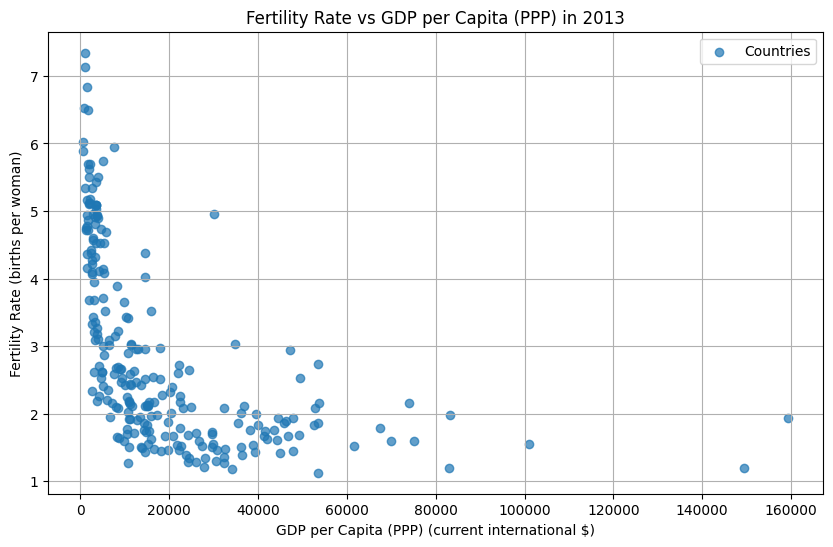

Correlation coefficient: -0.5171011715833227


In [8]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading datasets
fertility_rate_data = pd.read_excel("API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls", sheet_name="Data", skiprows=3)
gdp_per_capita_data = pd.read_excel("API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_31824.xls", sheet_name="Data", skiprows=3)

# Filtering the data for the year 2013
fertility_2013 = fertility_rate_data[['Country Name', '2013']]
fertility_2013.columns = ['Country Name', 'Fertility Rate']

gdp_2013 = gdp_per_capita_data[['Country Name', '2013']]
gdp_2013.columns = ['Country Name', 'GDP per Capita PPP']

# Merging the datasets on 'Country Name'
merged_data = pd.merge(fertility_2013, gdp_2013, on='Country Name')

# Droping rows with missing values (NaN)
merged_data.dropna(inplace=True)

# Createing a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['GDP per Capita PPP'], merged_data['Fertility Rate'], alpha=0.7, label='Countries')
plt.title('Fertility Rate vs GDP per Capita (PPP) in 2013')
plt.xlabel('GDP per Capita (PPP) (current international $)')
plt.ylabel('Fertility Rate (births per woman)')
plt.grid(True)

# Adding a legend 
plt.legend()

# Showing the plot
plt.show()

# Calculateing the correlation coefficient
correlation = merged_data['Fertility Rate'].corr(merged_data['GDP per Capita PPP'])
print(f'Correlation coefficient: {correlation}')


# QUESTION 4

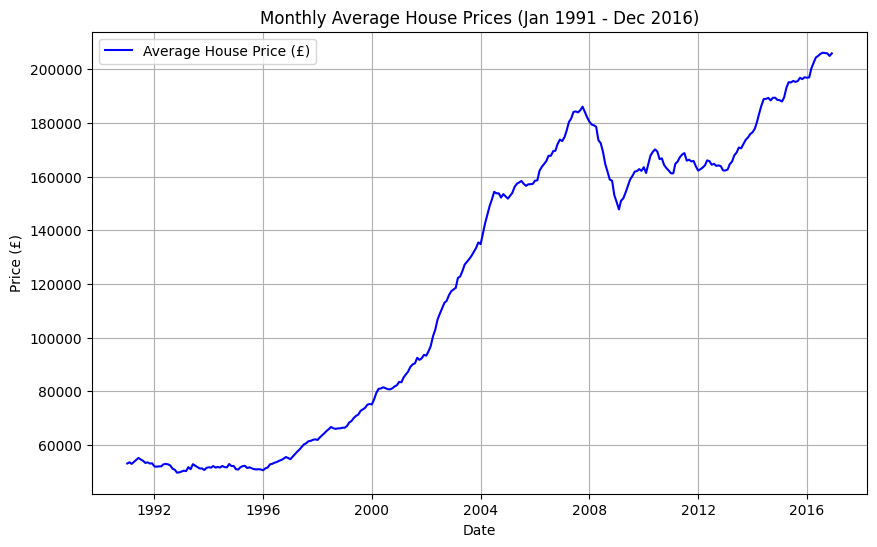

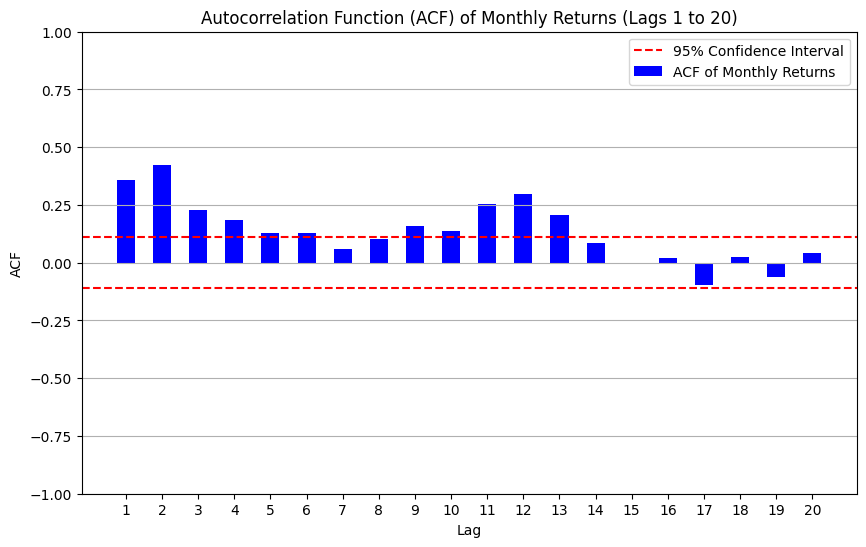

Annualized Return: 5.35423853535919%


In [9]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf


house_prices = pd.read_excel('Monthly Average House Price.xls') 
# renaming unnamed column from Unnamed: 0 to Date
house_prices.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
#  filtering average house price
house_prices = house_prices[['Date', 'Average House Price']]
# filtering data from 1991 to 2016
house_prices_filtered = house_prices[(house_prices['Date'] >= '1991-01-01') & (house_prices['Date'] <= '2016-12-31')]

# Ploting the time series of house prices (Jan 1991 - Dec 2016)
plt.figure(figsize=(10, 6)) 
plt.plot(house_prices_filtered['Date'],house_prices_filtered['Average House Price'], label='Average House Price (£)', color='blue')
plt.title('Monthly Average House Prices (Jan 1991 - Dec 2016)')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.grid(True)
plt.legend()
plt.show()



# calculating  average house price return
monthly_returns = house_prices_filtered['Average House Price'].pct_change().dropna()

# Calculating  ACF values for lags 1 to 20
lags = 20
acf_values = acf(monthly_returns, nlags=lags)

# Creating a  figure for the ACF plot and manually set size
fig, ax = plt.subplots(figsize=(10, 6))

# Ploting ACF values as a bar chart and adding a label for the legend
ax.bar(range(1, lags + 1), acf_values[1:], color='blue', width=0.5, label='ACF of Monthly Returns')

# Setting title and labels
ax.set_title('Autocorrelation Function (ACF) of Monthly Returns (Lags 1 to 20)')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')

# Calculating the critical value for 95% significance
n = len(monthly_returns)
conf_interval = 1.96 / np.sqrt(n)  # Approx. confidence interval for 95% significance

# Adding horizontal lines for statistical significance at 95%
ax.axhline(y=conf_interval, linestyle='--', color='red', label='95% Confidence Interval')
ax.axhline(y=-conf_interval, linestyle='--', color='red')

# Setting dynamic x-ticks and limits
ax.set_xticks(range(1, lags + 1))

# Setting dynamic y-ticks and limits
y_min, y_max = -1, 1 
ax.set_ylim(y_min, y_max)  # Setting y-limits
ax.grid(axis='y')

# Adding the legend 
plt.legend()

# Displaying the plot
plt.show()

# Calculating the total return and annualized return
total_return = (house_prices_filtered['Average House Price'].iloc[-1] / house_prices_filtered['Average House Price'].iloc[0]) 
annualized_return = ( total_return) ** (1 / (len(house_prices_filtered) / 12)) - 1
annualized_return_percentage = annualized_return * 100
print(f"Annualized Return: {annualized_return_percentage}%")


 # QUESTION 5

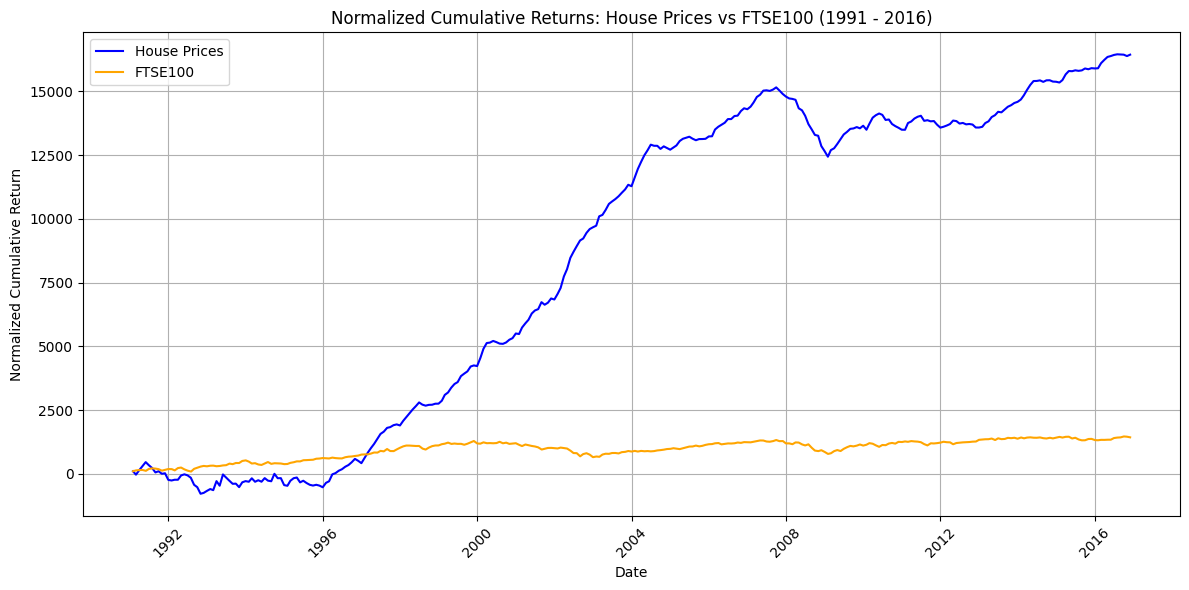

Average Annualized Return for FTSE100: 4.462515478640672%
It would have been better to invest in a UKhouse  over this period.


In [10]:
# importing  libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading monthly average house price data 
house_prices = pd.read_excel('Monthly Average House Price.xls') 

# Loading FTSE100 data from CSV
ftse100 = pd.read_csv('FTSE100.csv') 

# renaming unnamed column from unnamed: 0 to Date
house_prices.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

#  filtering average house price
house_prices = house_prices[['Date', 'Average House Price']]

# filtering data from 1991 to 2016
house_prices_filtered = house_prices[(house_prices['Date'] >= '1991-01-01') & (house_prices['Date'] <= '2016-12-31')]

ftse100['Date'] = pd.to_datetime(ftse100['Date'])

# filtering adjusted close
filtered_ftse100 = ftse100[['Date', 'Adj Close']]

# filtering data from 1991 to 2016
filtered_ftse100 = filtered_ftse100[(filtered_ftse100['Date'] >= '1991-01-01') & (filtered_ftse100['Date'] <= '2016-12-31')]
# sorting data by date
filtered_ftse100 = filtered_ftse100.sort_values(by='Date')

# Calculating annualized return
monthly_returns = house_prices_filtered['Average House Price'].pct_change().dropna()

# Calculateing cumulative returns using the monthly returns
cumulative_returns = monthly_returns.cumsum()

# Normalizing cumulative returns to start from 100
normalized_cumulative_returns = (cumulative_returns / cumulative_returns.iloc[0]) * 100

# Calculateing monthly returns using the Adj Close column
monthly_returns_ftse = filtered_ftse100['Adj Close'].pct_change().dropna()

# Calculating cumulative returns using the monthly returns
cumulative_returns_ftse = monthly_returns_ftse.cumsum()

# Normalizing cumulative returns to start from 100
normalized_cumulative_returns_ftse = (cumulative_returns_ftse / cumulative_returns_ftse.iloc[0]) * 100

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(house_prices_filtered['Date'].iloc[1:], normalized_cumulative_returns, label='House Prices', color='blue')
plt.plot(filtered_ftse100['Date'].iloc[1:], normalized_cumulative_returns_ftse, label='FTSE100', color='orange')

# Adding titles and labels
plt.title('Normalized Cumulative Returns: House Prices vs FTSE100 (1991 - 2016)')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


#  maximum and minimum years from the filtered_ftse100 DataFrame
max_year = filtered_ftse100['Date'].dt.year.max()
min_year = filtered_ftse100['Date'].dt.year.min()

# calculating  the number of years
years = max_year - min_year + 1
# Calculating  the average annualized return
average_annualized_return_ftse100 = (filtered_ftse100['Adj Close'].iloc[-1] / filtered_ftse100['Adj Close'].iloc[0]) ** (1/years) - 1

# printing average_annualized_return on Percentage 

print(f'Average Annualized Return for FTSE100: {average_annualized_return_ftse100*100 }%')
#  maximum and minimum years from the house_prices_filtered DataFrame
#calculate average annualized return for montly house price
max_year = house_prices_filtered['Date'].dt.year.max()
min_year = house_prices_filtered['Date'].dt.year.min()

# calculating  the number of years
years = max_year - min_year + 1
# Calculating  the average annualized return
average_annualized_return = (house_prices_filtered['Average House Price'].iloc[-1] / house_prices_filtered['Average House Price'].iloc[0]) ** (1/years) - 1

# making conclusion based on the average annualized return for FTSE100 and monthly house price          
if average_annualized_return_ftse100 > average_annualized_return:

    print("It would  have been better to invest in the UK stock market over this period.")
else:

    print("It would have been better to invest in a UKhouse  over this period.")
    



